In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import datetime

In [2]:
df = pd.read_json('StreamingHistory0.json')
df.columns = ['Date', 'Band', 'Track', 'Duration']
df['Date'] = pd.to_datetime(df['Date'])
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'] = df['Duration'] / 1000
df = df.sort_values(by='Date')
df[['Date', 'Band', 'Track', 'Duration']] = df[['Date', 'Band', 'Track', 'Duration']] .replace([None], '')

drop_list = list()
drop_list.append(df[(df['Duration'] < 27.5) | (df['Date'] < datetime.datetime(2022, 1, 1))].index)

print('before:',len(df))

for i in drop_list:
    df.drop(i,inplace=True)

print('after:',len(df))

before: 6852
after: 4322


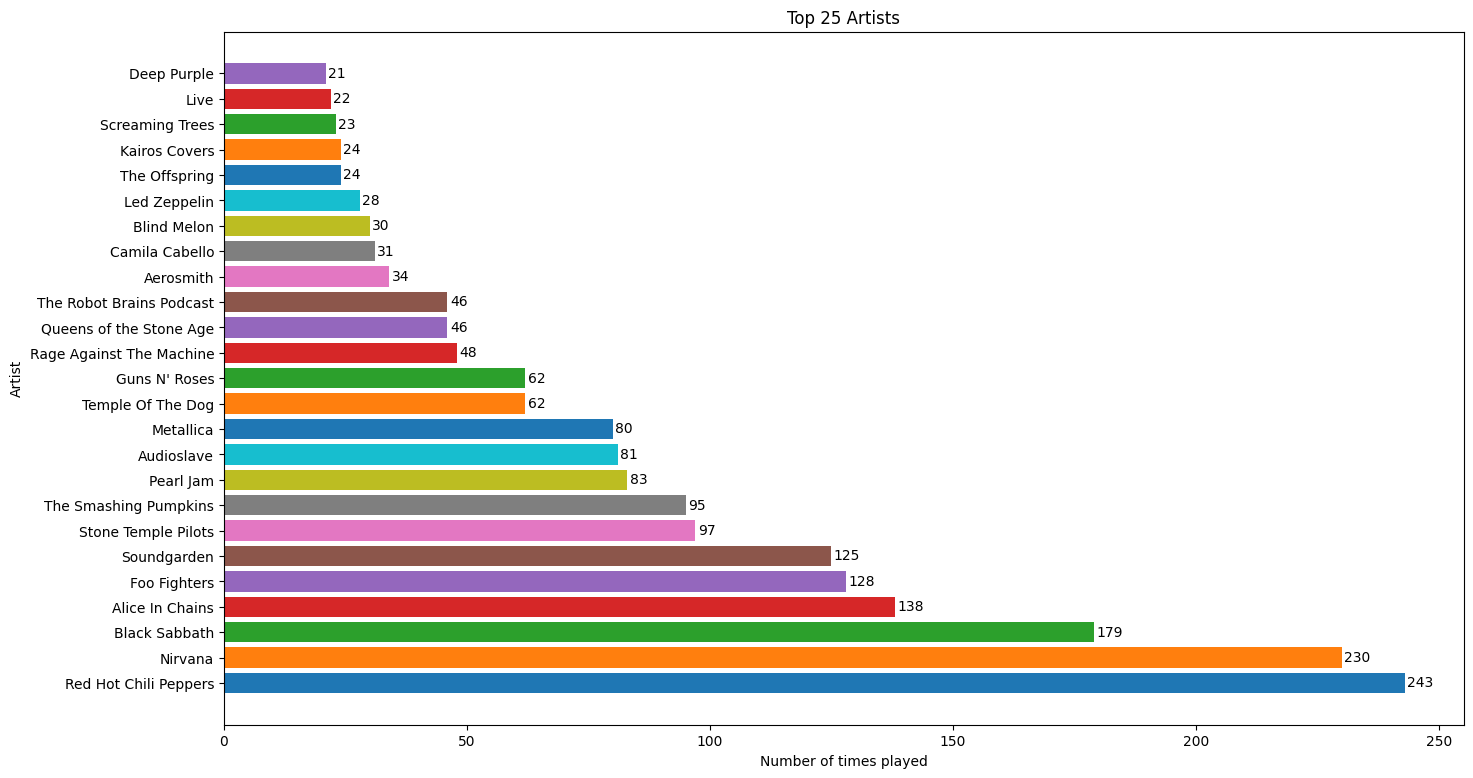

In [3]:
TOPARTISTS = 25

artists = np.asarray(Counter(df['Band']).most_common(TOPARTISTS))

fig, ax = plt.subplots(figsize =(16, 9))

plt.title('Top ' + str(TOPARTISTS) + ' Artists')

for artist, quant in zip(artists[:,0], artists[:,1]):
    ax.barh(artist,int(quant))

for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.25, str(round((i.get_width()), 2)), fontweight ='light')

plt.xlabel('Number of times played')
plt.ylabel('Artist')
plt.show()


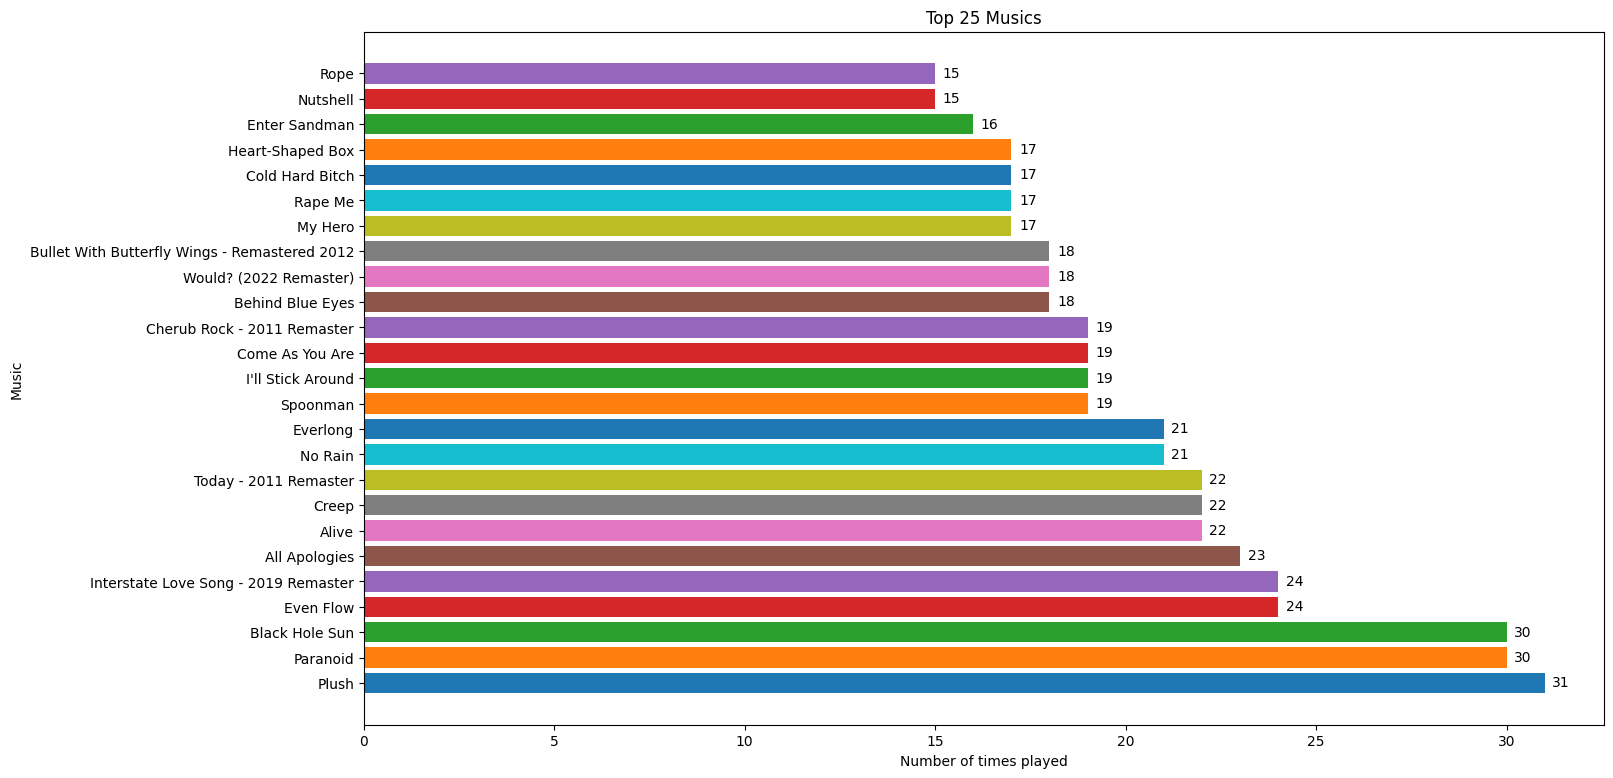

In [4]:
TOPSONGS = 25

musics = np.asarray(Counter(df['Track']).most_common(TOPSONGS))
fig, ax = plt.subplots(figsize =(16, 9))
plt.title('Top ' + str(TOPSONGS) + ' Musics')

for track, quant in zip(musics[:,0], musics[:,1]):
    ax.barh(track,int(quant))

for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.25, str(round((i.get_width()), 2)), fontweight ='light')

plt.xlabel('Number of times played')
plt.ylabel('Music')
plt.show()

In [5]:
seconds = df['Duration'].sum()
print('Seconds:',seconds)
min = seconds/60
print('Minutes:',min)
hours = min/60
print('Hours:',hours)
days = hours/24
print('Days:',days)

Seconds: 1075233.876
Minutes: 17920.564599999998
Hours: 298.67607666666663
Days: 12.444836527777776


In [6]:
unique_tracks = df['Track'].unique()
print('Unique Tracks:',len(unique_tracks))

unique_artists = df['Band'].unique()
print('Unique Artists:',len(unique_artists))

df['Date Days'] = df['Date'].dt.strftime('%Y-%m-%d')
unique_days = df['Date Days'].unique()

df.drop(['Date Days'], axis=1, inplace=True)

print('Days heard:',len(unique_days),'Days not heard:',days.days - len(unique_days))

Unique Tracks: 1525
Unique Artists: 808


AttributeError: 'numpy.float64' object has no attribute 'days'

TODO:
- tirar podcasts
- labels nos bar plots
- time plot
- convert time bem
- try webscrapping (put a photo of the band for the name searched)